<img src="https://root.cern.ch/root/htmldoc/guides/users-guide/pictures/rootlogo.png" height="50%" width="50%">
<img src="http://jupyter.org/assets/main-logo.svg">

## Features

* C++ highlighting
* C++ Tab-completion
* Python(Magic Cell) highlighting
* Python(Magic Cell) Tab-completion (using jedi)
* R(Magic Cell) highlighting
* R(Magic Cell) Tab-completion (using jedi)
* JSROOT implemented
* ipython magics supported(shell,python,html,etc..)
* I/O capture for segfault and in general
* new magic added %%doc to show documentation for classes
* magics %%cpp to declare functions and classes in cells or to compile with ACLiC
* Tested under Gnu/Linux and MacOSX Yisemite

## OPINION NOTE:
I think that with this system, we can do a real data analysis using multiple languages
and working between they


In [1]:
#include <iostream>
#include <TCanvas.h>
#include <TF1.h>
#include <TRInterface.h>

# Plotting system

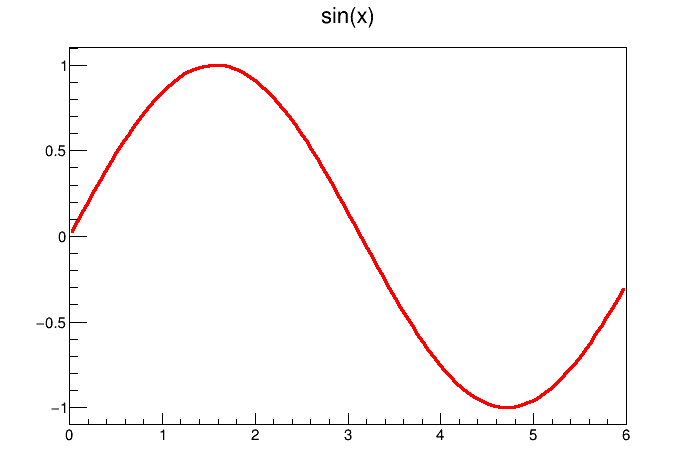

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [2]:
TF1 f("f","sin(x)",0,6);
f.Draw();
gPad->Draw();

# Segfault capture

In [ ]:
int *a=0;
a[10]=0;

# Using our magic %%cpp magic to declare functions and classes

In [3]:
%%cpp -d
void MyFunction()
{
    std::cout<<"Hello from MyFucntion"<<std::endl;
}

In [4]:
MyFunction();

Hello from MyFucntion


In [5]:
%%cpp -d
class Test
{
  private:
    std::string msg;
  public:
  Test(std::string _msg);
  void Print();  
};
Test::Test(std::string _msg)
{
    msg=_msg;
}
void Test::Print()
{
    std::cout<<msg<<std::endl;
}

In [6]:
Test t("Hello from Class");
t.Print();

Hello from Class


# Using our magic %%doc (require discussion)

In [7]:
%%doc -c TTree

# Using other internal magics
### NOTE: 
* the ipython kernels enable a set of default magics for all kernels, in iPyROOT in Cpp mode, the magics dont work(is a bug)
* In this kernel the default magics is working


# Bash

In [8]:
%%shell
for i in $(seq 1 1 10)
do
    echo -n $i" "
done

1 2 3 4 5 6 7 8 9 10 


# HTML and Javascript

LHC Video from CERN's channel in youtube (may useful for tutorials)


In [ ]:
%%html
<iframe width="100%" height="500" src="https://www.youtube.com/embed/pQhbhpU9Wrg" frameborder="0" allowfullscreen></iframe>   

# Time to measure the time taken for the execution of the cell

In [9]:
%%time
for(int i=0;i<3;i++)
{
    sleep(1);
}
std::cout<<"Done!"<<std::endl;

Done!
Time: 3.02104997635 seconds.



# Using Python Magic
### NOTE
* support highlighting
* support Tab-completion (lets try)

Testing Python


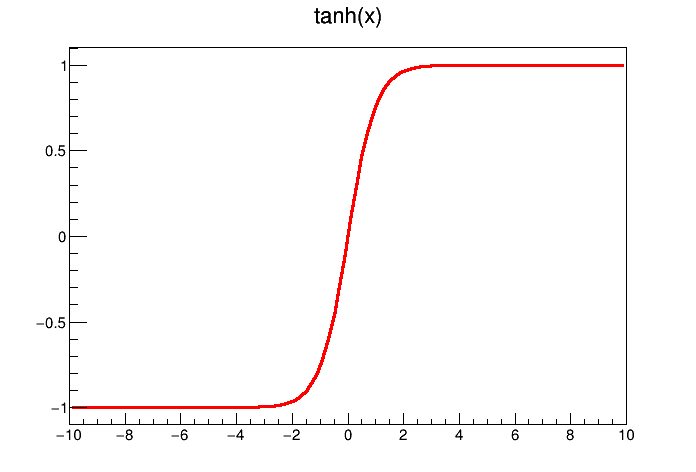

DONE!


In [10]:
%%python
from ROOT import TF1, gPad
print("Testing Python")
f=TF1("f","tanh(x)",-10,10)
f.Draw()
gPad.Draw()
print("DONE!")

# Using R Magic
Interaction using ROOT-R
### NOTE
* support highlighting

* support Tab-completion (lets try)

# Plotting Normal Distribution in R

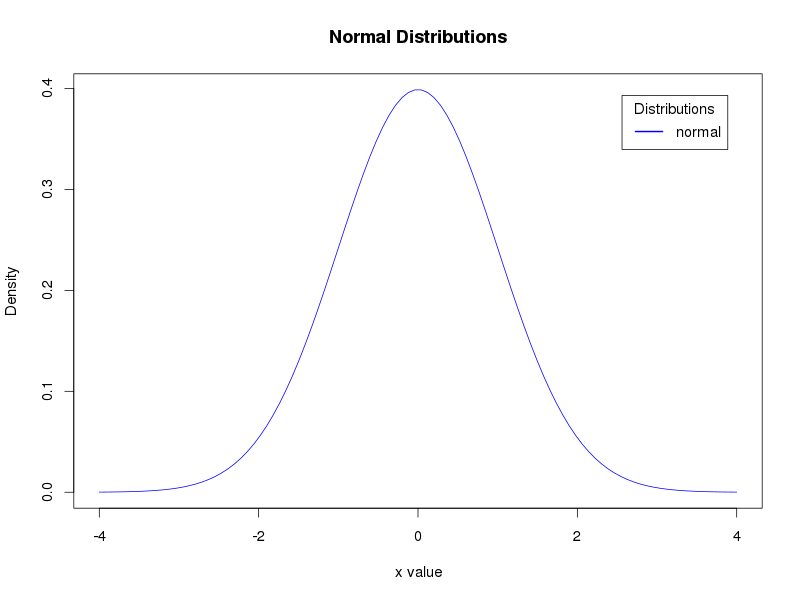

In [11]:
%%r
x <- seq(-4, 4, length=100)
hx <- dnorm(x)

plot(x, hx, type="l", lty=1, xlab="x value",
  ylab="Density", main="Normal Distributions",col="blue")

legend("topright", inset=.05, title="Distributions",
  c("normal"), lwd=2, lty=c(1), col="blue")

# Interaction with C++
Getting variables(data) from R and ploting with ROOT

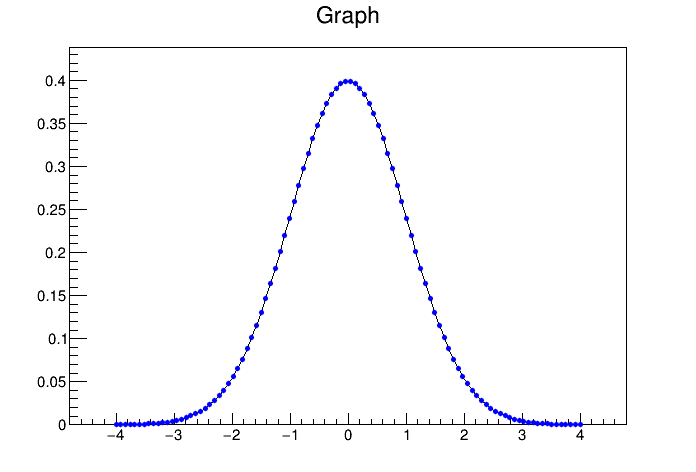

In [12]:
ROOT::R::TRInterface &r=ROOT::R::TRInterface::Instance();
std::vector<float> x;
std::vector<float> hx;
r["x"]>>x;
r["hx"]>>hx;
TCanvas c("c");
TGraph g(x.size(),&x.begin()[0],&hx.begin()[0]);
g.Draw();
c.Draw();

# Other R plots examples


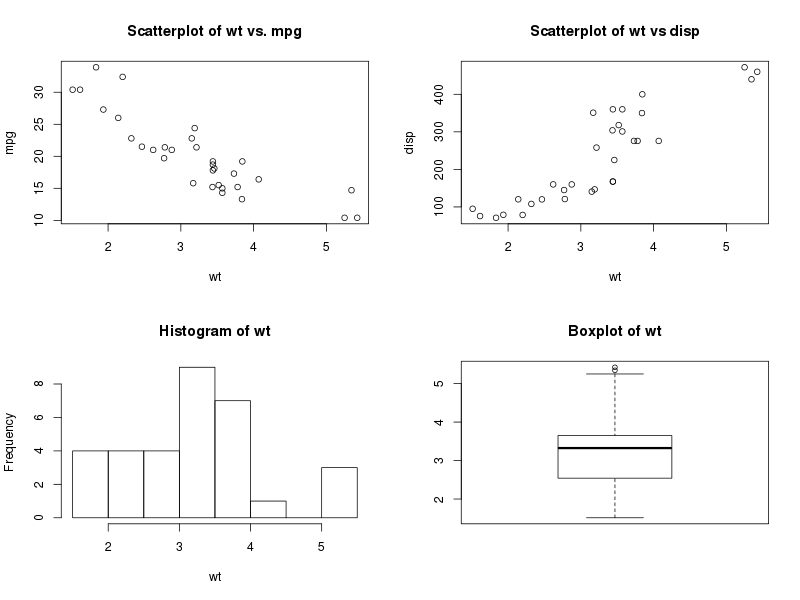

In [13]:
%%r
attach(mtcars)
par(mfrow=c(2,2))
plot(wt,mpg, main="Scatterplot of wt vs. mpg")
plot(wt,disp, main="Scatterplot of wt vs disp")
hist(wt, main="Histogram of wt")
boxplot(wt, main="Boxplot of wt")

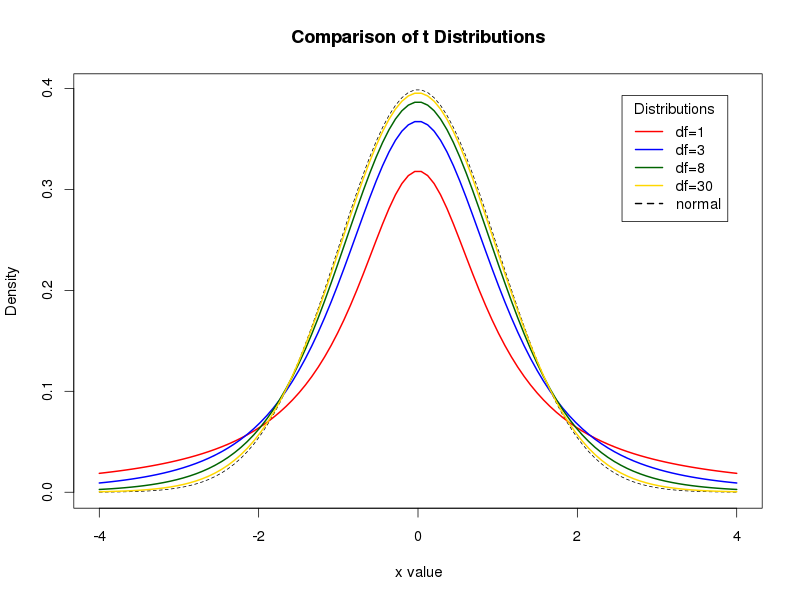

In [14]:
%%r
x <- seq(-4, 4, length=100)
hx <- dnorm(x)

degf <- c(1, 3, 8, 30)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=8", "df=30", "normal")

plot(x, hx, type="l", lty=2, xlab="x value",
  ylab="Density", main="Comparison of t Distributions")

for (i in 1:4){
  lines(x, dt(x,degf[i]), lwd=2, col=colors[i])
}

legend("topright", inset=.05, title="Distributions",
  labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)